In [1]:
CONFIRMED = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
DEATHS = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
RECOVERED = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'

In [2]:
# pip install pandas
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [3]:
confirmed = pd.read_csv(CONFIRMED)
deaths = pd.read_csv(DEATHS)
recovered = pd.read_csv(RECOVERED)

In [4]:
confirmed.head(40)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,1/30/21,1/31/21,2/1/21,2/2/21,2/3/21,2/4/21,2/5/21,2/6/21,2/7/21,2/8/21
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,55008,55023,55059,55121,55174,55231,55265,55330,55335,55359
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,77251,78127,78992,79934,80941,81993,83082,84212,85336,86289
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,107122,107339,107578,107841,108116,108381,108629,108629,109088,109313
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,9885,9937,9972,10017,10070,10137,10172,10206,10251,10275
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,19782,19796,19829,19900,19937,19996,20030,20062,20086,20112
5,NaN,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,...,218,234,234,249,249,268,277,288,299,316
6,NaN,Argentina,-38.416100,-63.616700,0,0,0,0,0,0,...,1922264,1927239,1933853,1943548,1952744,1961635,1970009,1976689,1980347,1985501
7,NaN,Armenia,40.069100,45.038200,0,0,0,0,0,0,...,166901,167026,167088,167231,167421,167568,167726,167937,168088,168177
8,Australian Capital Territory,Australia,-35.473500,149.012400,0,0,0,0,0,0,...,118,118,118,118,118,118,118,118,118,118
9,New South Wales,Australia,-33.868800,151.209300,0,0,0,0,3,4,...,5104,5110,5112,5114,5117,5117,5119,5120,5123,5125


In [5]:
confirmed = confirmed.set_index('Country/Region')
deaths = deaths.set_index('Country/Region')
recovered = recovered.set_index('Country/Region')

In [6]:
def confirmed_data(country):
    data = confirmed.loc[country].iloc[3:,] # First 4 observations are metadata 
    data.index = pd.to_datetime(data.index)
    data = data.sort_index(ascending=True)
    return data

In [7]:
def difference(series, interval=1):
	diff = pd.Series(index=series.index, dtype=int)
	for i in range(interval, len(series)):
		value = series[i] - series[i - interval]
		diff[i] = value
	return pd.Series(diff)

In [8]:
def Moving_average(dataset, days=7):
    series = pd.Series(index=dataset.index, dtype=int)
    for i in range(days, len(dataset)):
        value = dataset[i] + dataset[i-1] + dataset[i-2] + dataset[i-3] + dataset[i-4] + dataset[i-5] + dataset[i-6]
        series[i] = value / days
    return series

<AxesSubplot:>

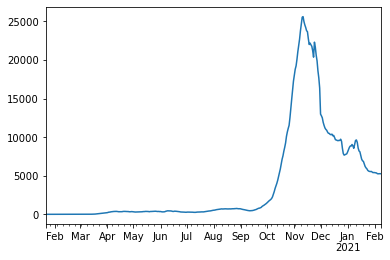

In [12]:
# 7-day moving average of confirmed covid cases in Poland
Moving_average(difference(confirmed_data('Poland'))).plot()